<a href="https://colab.research.google.com/github/Ellisetr/Intelligent-Systems-and-Technologies/blob/main/%D0%98%D0%A1%D0%A2_1_2(%D0%BB%D0%BE%D0%BA%D0%B0%D0%BB%D1%8C%D0%BD%D1%8B%D0%B5_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install --index-url https://test.pypi.org/simple/ PyARMViz
%pip install apriori_python
%pip install efficient-apriori
%pip install fpgrowth_py

import PyARMViz
import pandas as pd
import numpy as np
from apriori_python import apriori
from efficient_apriori import apriori as ef_apriori
from fpgrowth_py import fpgrowth
import time
import matplotlib.pyplot as plt

Looking in indexes: https://test.pypi.org/simple/, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
small_df = pd.read_excel('https://docs.google.com/spreadsheets/d/1aZTDk8rHtzlCi09DDvI-w1wEERD2aUoL/export?format=xlsx',header=None)
small_df

,0,1,2,3,4,5,6
0,Булочка с маком,Русианно,Эспрессо,Булочка с корицей,Чёрный чай,Какао,Пражский
1,Чёрный чай,Какао,Булочка с маком,Пражский,Мокка,Эспрессо,NaN
2,Пражский,Булочка с корицей,Эспрессо,Латте,Булочка с маком,Зелёный чай,NaN
3,Круасан,Эспрессо,Наполеон,Латте,Мокка,NaN,NaN
4,Мокка,Латте,Булочка с маком,Эспрессо,NaN,NaN,NaN
5,Булочка с корицей,Пражский,Круасан,Эспрессо,Булочка с маком,NaN,NaN
6,Чёрный чай,Зелёный чай,Эспрессо,Круасан,Русианно,Латте,NaN
7,Русианно,Круасан,Зелёный чай,Булочка с маком,Эспрессо,Латте,NaN
8,Круасан,Русианно,Булочка с корицей,Наполеон,Какао,Булочка с маком,NaN
9,Латте,Наполеон,Булочка с корицей,Пражский,NaN,NaN,NaN


In [ ]:
transactions = []
for i in range(small_df.shape[0]):
    raw = small_df.loc[i]
    transaction = []
    for j in range(small_df.shape[1]):
        if raw[j] is not np.nan:
            transaction.append(str(raw[j]))
    transactions.append(transaction)
print(transactions)

[['Булочка с маком', 'Русианно', 'Эспрессо', 'Булочка с корицей', 'Чёрный чай', 'Какао', 'Пражский'], ['Чёрный чай', 'Какао', 'Булочка с маком', 'Пражский', 'Мокка', 'Эспрессо'], ['Пражский', 'Булочка с корицей', 'Эспрессо', 'Латте', 'Булочка с маком', 'Зелёный чай'], ['Круасан', 'Эспрессо', 'Наполеон', 'Латте', 'Мокка'], ['Мокка', 'Латте', 'Булочка с маком', 'Эспрессо'], ['Булочка с корицей', 'Пражский', 'Круасан', 'Эспрессо', 'Булочка с маком'], ['Чёрный чай', 'Зелёный чай', 'Эспрессо', 'Круасан', 'Русианно', 'Латте'], ['Русианно', 'Круасан', 'Зелёный чай', 'Булочка с маком', 'Эспрессо', 'Латте'], ['Круасан', 'Русианно', 'Булочка с корицей', 'Наполеон', 'Какао', 'Булочка с маком'], ['Латте', 'Наполеон', 'Булочка с корицей', 'Пражский'], ['Чёрный чай', 'Наполеон', 'Пражский', 'Булочка с корицей', 'Эспрессо', 'Зелёный чай', 'Булочка с маком'], ['Латте', 'Пражский', 'Какао'], ['Круасан', 'Пражский', 'Русианно', 'Чёрный чай', 'Эспрессо'], ['Латте', 'Мокка', 'Зелёный чай'], ['Латте', 'Бул

In [ ]:
start = time.time()
freq_item_set, rules = apriori(transactions, minSup = 0.2, minConf = 0.6)
end = time.time()
for r in rules:
    print(r)

time_apriori_60 = end - start
print(f'Time is {time_apriori_60}')

[{'Булочка с маком'}, {'Булочка с корицей'}, 0.6470588235294118]
[{'Мокка'}, {'Латте'}, 0.6666666666666666]
[{'Пражский'}, {'Булочка с корицей', 'Булочка с маком'}, 0.6666666666666666]
[{'Эспрессо', 'Булочка с маком'}, {'Пражский'}, 0.6666666666666666]
[{'Пражский', 'Булочка с маком'}, {'Эспрессо'}, 0.6666666666666666]
[{'Булочка с корицей', 'Латте'}, {'Булочка с маком'}, 0.6666666666666666]
[{'Круасан'}, {'Эспрессо'}, 0.7]
[{'Чёрный чай'}, {'Эспрессо'}, 0.7272727272727273]
[{'Булочка с корицей', 'Булочка с маком'}, {'Пражский'}, 0.7272727272727273]
[{'Булочка с корицей'}, {'Булочка с маком'}, 0.7333333333333333]
[{'Пражский'}, {'Булочка с корицей'}, 0.75]
[{'Наполеон'}, {'Булочка с корицей'}, 0.75]
[{'Пражский'}, {'Булочка с маком'}, 0.75]
[{'Мокка'}, {'Эспрессо'}, 0.7777777777777778]
[{'Эспрессо', 'Пражский'}, {'Булочка с маком'}, 0.8571428571428571]
[{'Булочка с корицей', 'Пражский'}, {'Булочка с маком'}, 0.8888888888888888]
[{'Пражский', 'Булочка с маком'}, {'Булочка с корицей'}, 0

In [ ]:
start = time.time()
freq_item_set, rules = ef_apriori(transactions, min_support = 0.2, min_confidence = 0.6)
end = time.time()
PyARMViz.generate_rule_graph_plotly(rules)

time_ef_apr_60 = end - start
print(time_ef_apr_60)

0.0013091564178466797


In [ ]:
rules_rhs = filter(lambda rule: len(rule.lhs) == 1 and len(rule.rhs) == 1, rules)
for rule in sorted(rules_rhs, key=lambda rule: rule.lift):
  print(rule)
rules_rhs = filter(lambda rule: len(rule.lhs) == 2 and len(rule.rhs) == 1, rules)
for rule in sorted(rules_rhs, key=lambda rule: rule.lift):
  print(rule)
rules_rhs = filter(lambda rule: len(rule.lhs) == 1 and len(rule.rhs) == 2, rules)
for rule in sorted(rules_rhs, key=lambda rule: rule.lift):
  print(rule)

{Булочка с корицей} -> {Латте} (conf: 0.600, supp: 0.300, lift: 0.900, conv: 0.833)
{Круасан} -> {Латте} (conf: 0.600, supp: 0.200, lift: 0.900, conv: 0.833)
{Мокка} -> {Латте} (conf: 0.667, supp: 0.200, lift: 1.000, conv: 1.000)
{Зелёный чай} -> {Булочка с маком} (conf: 0.600, supp: 0.200, lift: 1.059, conv: 1.083)
{Булочка с маком} -> {Булочка с корицей} (conf: 0.647, supp: 0.367, lift: 1.294, conv: 1.417)
{Булочка с корицей} -> {Булочка с маком} (conf: 0.733, supp: 0.367, lift: 1.294, conv: 1.625)
{Круасан} -> {Эспрессо} (conf: 0.700, supp: 0.233, lift: 1.312, conv: 1.556)
{Пражский} -> {Булочка с маком} (conf: 0.750, supp: 0.300, lift: 1.324, conv: 1.733)
{Зелёный чай} -> {Латте} (conf: 0.900, supp: 0.300, lift: 1.350, conv: 3.333)
{Чёрный чай} -> {Эспрессо} (conf: 0.727, supp: 0.267, lift: 1.364, conv: 1.711)
{Мокка} -> {Эспрессо} (conf: 0.778, supp: 0.233, lift: 1.458, conv: 2.100)
{Пражский} -> {Булочка с корицей} (conf: 0.750, supp: 0.300, lift: 1.500, conv: 2.000)
{Булочка с к

In [ ]:
start = time.time()
freq_items_set, rules = fpgrowth(transactions, minSupRatio=0.2, minConf=0.6)
rules_set = []
end = time.time()
for r in rules:
    if r not in rules_set:
        rules_set.append(r)
for r in rules_set:
    print(r)

time_fpg_60 = end - start

[{'Наполеон'}, {'Булочка с корицей'}, 0.75]
[{'Мокка'}, {'Латте'}, 0.6666666666666666]
[{'Мокка'}, {'Эспрессо'}, 0.7777777777777778]
[{'Зелёный чай'}, {'Латте'}, 0.9]
[{'Круасан'}, {'Эспрессо'}, 0.7]
[{'Чёрный чай'}, {'Эспрессо'}, 0.7272727272727273]
[{'Эспрессо', 'Булочка с маком'}, {'Пражский'}, 0.6666666666666666]
[{'Эспрессо', 'Пражский'}, {'Булочка с маком'}, 0.8571428571428571]
[{'Пражский', 'Булочка с маком'}, {'Эспрессо'}, 0.6666666666666666]
[{'Пражский'}, {'Булочка с корицей'}, 0.75]
[{'Пражский'}, {'Булочка с маком'}, 0.75]
[{'Пражский'}, {'Булочка с корицей', 'Булочка с маком'}, 0.6666666666666666]
[{'Булочка с корицей', 'Булочка с маком'}, {'Пражский'}, 0.7272727272727273]
[{'Булочка с корицей', 'Пражский'}, {'Булочка с маком'}, 0.8888888888888888]
[{'Пражский', 'Булочка с маком'}, {'Булочка с корицей'}, 0.8888888888888888]
[{'Булочка с корицей', 'Латте'}, {'Булочка с маком'}, 0.6666666666666666]
[{'Булочка с корицей'}, {'Булочка с маком'}, 0.7333333333333333]
[{'Булочка с

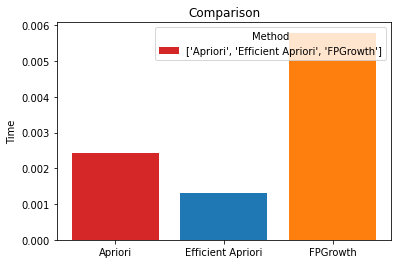

In [ ]:
fig, ax = plt.subplots()

methods = ['Apriori', 'Efficient Apriori', 'FPGrowth']
counts = [time_apriori_60, time_ef_apr_60, time_fpg_60]
bar_labels = ['Apriori', 'Efficient Apriori', 'FPGrowth']
bar_colors = ['tab:red', 'tab:blue', 'tab:orange']

ax.bar(methods, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('Time')
ax.set_title('Comparison')
ax.legend(title='Method')

plt.show()

In [ ]:
start = time.time()
freq_item_set, rules = apriori(transactions, minSup = 0.2, minConf = 0.8)
for r in rules:
    print(r)
end = time.time()
print(f'Time is {end-start}')

[{'Эспрессо', 'Пражский'}, {'Булочка с маком'}, 0.8571428571428571]
[{'Булочка с корицей', 'Пражский'}, {'Булочка с маком'}, 0.8888888888888888]
[{'Пражский', 'Булочка с маком'}, {'Булочка с корицей'}, 0.8888888888888888]
[{'Зелёный чай'}, {'Латте'}, 0.9]
Time is 0.021595478057861328


In [ ]:
freq_item_set, rules = ef_apriori(transactions, min_support = 0.2, min_confidence = 0.8)
PyARMViz.generate_rule_graph_plotly(rules)

In [ ]:
rules_rhs = filter(lambda rule: len(rule.lhs) == 1 and len(rule.rhs) == 1, rules)
for rule in sorted(rules_rhs, key=lambda rule: rule.lift):
  print(rule)
rules_rhs = filter(lambda rule: len(rule.lhs) == 2 and len(rule.rhs) == 1, rules)
for rule in sorted(rules_rhs, key=lambda rule: rule.lift):
  print(rule)
rules_rhs = filter(lambda rule: len(rule.lhs) == 1 and len(rule.rhs) == 2, rules)
for rule in sorted(rules_rhs, key=lambda rule: rule.lift):
  print(rule)

{Зелёный чай} -> {Латте} (conf: 0.900, supp: 0.300, lift: 1.350, conv: 3.333)
{Пражский, Эспрессо} -> {Булочка с маком} (conf: 0.857, supp: 0.200, lift: 1.513, conv: 3.033)
{Булочка с корицей, Пражский} -> {Булочка с маком} (conf: 0.889, supp: 0.267, lift: 1.569, conv: 3.900)
{Булочка с маком, Пражский} -> {Булочка с корицей} (conf: 0.889, supp: 0.267, lift: 1.778, conv: 4.500)


In [ ]:
freq_items_set, rules = fpgrowth(transactions, minSupRatio=0.2, minConf=0.8)
rules_set = []
for r in rules:
    if r not in rules_set:
        rules_set.append(r)
for r in rules_set:
    print(r)

[{'Зелёный чай'}, {'Латте'}, 0.9]
[{'Эспрессо', 'Пражский'}, {'Булочка с маком'}, 0.8571428571428571]
[{'Булочка с корицей', 'Пражский'}, {'Булочка с маком'}, 0.8888888888888888]
[{'Пражский', 'Булочка с маком'}, {'Булочка с корицей'}, 0.8888888888888888]
